<a href="https://colab.research.google.com/github/saurabbh14/Python_tutorials_summer_sem_2021/blob/main/Py_tut_summer_sem_2021__4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recap

Let's go over the things you learnt so far.

Here is a (not anymore so) short list of all the concepts you got to know already:

- Math operations in Python (`+, -, *, /, //, %`)
- Basic data types in Python (`bool`, `float`, `int`, `str`)
- Calling functions (`print()`, `help()`)
- Lists (`[1, 2, 3, 4]`)
- Control flow : If-else statements (asking questions, making decisions)
- Loops (`for` and `while`)
- Defining functions
- Modules (`numpy`, `matplotlib.pyplot`, local modules)
- Velocity Verlet Algorithm(Molecular dynamics simulations) 
- Input and output
- Visualizing spectra

Did you encounter any problems, syntax errors or other issues in your home-based Python journey? 




Let's start with some exercise!

**Exercise I:** Simplify the code below to calculate the Boltzmann distribution for a many state system with a for loop. Can you write down the mathematical expression using alredy written code(or from your memory)?

In [ ]:
# import modules
import numpy as np

# set the constant
k_B = 8.6173303e-5 # eV/K

# set the temperature
T = 300 # K

# set the state energies
energies = [0., 0.01, 0.02, 0.03] # energies in eV
n_states = len(energies) # the len-function returns the number of items in a list, in our case it is the number of states

### TODO: MODIFY THE CODE BELOW ###
list1 = [np.exp(-val/(k_B*T)) for val in energies]

print(list1)

[1.0, 0.6792151057804271, 0.4613331599203168, 0.31334445101529673]


In [ ]:
## short version of above code
import numpy as np

# set the constant
k_B = 8.6173303e-5 # eV/K

# set the temperature
T = 300 # K

# set the state energies
energies = [0., 0.01, 0.02, 0.03] # energies in eV
n_states = len(energies) # the len-function returns the number of items in a list, in our case it is the number of states

### TODO: MODIFY THE CODE BELOW ###

boltz_list = [ np.exp(-energies[i]/(k_B*T)) for i in range(n_states)]

probabilities = [np.exp(-energies[i]/(k_B*T)) / sum(boltz_list) for i in range(n_states)]

for i,prob in enumerate(probabilities):
  print(f"Probability for state 0: {probabilities[i:prob]}")

print(f"The sum of all probabilities is: {sum(probabilities)}")

TypeError: ignored

**Exercise II:** Define a function for the above code.

In [ ]:
### TODO: DEFINE YOUR FUNCTION HERE ###



# set the temperature
T = 300 # K
# set the state energies
energies = [0., 0.01, 0.02, 0.03] # energies in eV

probs = Boltzmann_distribution(energies, T)
print(probs)
print(sum(probs))

## Exercise: Marcus Theory

### Introduction

Marcus theory, developed by Rudolph A. Marcus in 1956, provides a simple way to calculate the dynamics of charge transfer reactions from experimentally accesible parameters. The derivation is beyond the scope of this exercise. You can read about it e.g. on wikipedia:

https://en.wikipedia.org/wiki/Marcus_theory

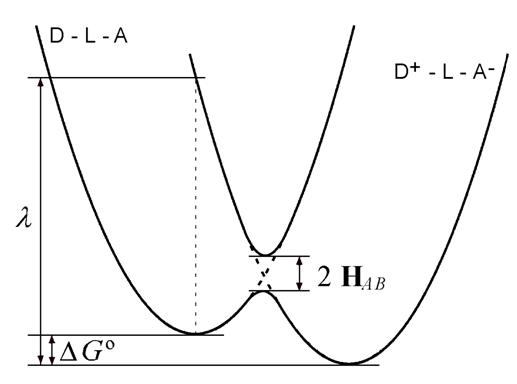

Marcus theory allows to calculate the rate constant for CT from a donor (D) to an acceptor (A) as:

$$ k_{D \rightarrow A} = \frac{2 \pi}{\hbar} | H_{AB} |^2 \frac{1}{\sqrt{4 \pi \lambda k_B T}} e^{ - \frac{ (\lambda + \Delta G)^2}{4 \lambda k_B T}}$$

Here, $\hbar$ is the reduced Planck constant, $H_{AB}$ is the coupling constant between D and A, $\lambda$ is the reorganization energy, $k_B$ is the Boltzmann constant, $T$ is the temperature (in Kelvin) and $\Delta G$ is the driving force of the reaction. The driving force is calculated as:

$$ \Delta G = E_{\mathrm{min}}(A) - E_{\mathrm{min}}(D) $$

The rate constant is only calculated like this for downhill CT, i.e. for a transition from a high energy state, to a low energy state, where $\Delta G$ is negative. For the reversed case, when $\Delta G$ is positive, the rate constant can be derived from detailed balance (Boltzmann distribution) and the rate constant for the back reaction as follows:

$$ k_{A \rightarrow D} = k_{D \rightarrow A} e^{ \frac{\Delta G_{DA}}{k_B T}} $$



### Calculate a rate constant

**Define a function that calculates the rate constant from Marcus theory, given $\lambda$, $\Delta G$, $H_{AB}$ and $T$. Make sure to correctly account for the different cases for $\Delta G < 0$ and $\Delta G \geq 0$!**

*The keyword `lambda` is predefined in python and should not be used as a variable name. Better use "l" or "lmbda"!*

In [ ]:
import numpy as np

### define some natural constants
k_B = 8.6173303e-5 # eV/K
h = 4.135667662e-15 # eV * s
hbar = h / ( 2.*np.pi) # eV * s


def rate_constant(lmbda, G, H_ab, T):
  """Calculates Marcus Theory rate constant.

All input values in eV or K."""
  ### TODO: INSERT YOUR CODE HERE ###
  if (G < 0):
    k= 2 * np.pi * H_ab**2 *np.exp(-((lmbda+G)**2) /(4*lmbda*k_B*T)) \
       /(hbar *np.sqrt(4 *np.pi *lmbda *k_B *T))     
  else:
    G_back=-G
    k_back= 2 * np.pi * H_ab**2 *np.exp(-((lmbda+G_back)**2) /(4*lmbda*k_B*T)) \
       /(hbar *np.sqrt(4 *np.pi *lmbda *k_B *T))   
    k= k_back *np.exp(G_back/(k_B *T))  
  return k # in s^(-1)

Now we can use this function to calculate rate constants. We use the parameters of a system investigated by Koch et al. (J. Phys. Chem. C 2017, 121, 30, 16066–16078; https://pubs.acs.org/doi/10.1021/acs.jpcc.7b02812).

**Does your result correspond to the rate constant $k_{i,\mathrm{ET}}$ of the system T(BL1)-T(CS1) in Table 2 of Koch et al.?**

In [ ]:
### define system parameters ###
dG = -0.3258 # eV
H_AB = 0.09035 # eV
l = 0.8442 # eV
T = 295 # K

print(f"The rate constant is {rate_constant(l, dG, H_AB, T) / 1e12: 5.2f} ps^(-1)")

The rate constant is  6.56 ps^(-1)


### Calculate CT dynamics


For a simple chemical reaction, where D $\overset{k_{DA}}\rightarrow$ A, the rate eqation is given as,
\begin{eqnarray}
  \frac{dD}{dt}=\frac{dA}{dt}=-k_{DA}D=k_{AD}A
\end{eqnarray}
The general form of above equation involving $m$ number of species reads,
\begin{eqnarray}
  \frac{da_{i}}{dt}=-\sum_{j}^{m}k_{ij}a_{i}+\sum_{j}^{m}k_{ij}a_{j}(i=1,2,...,m;i\ne j)
\end{eqnarray}
where $a_{i}$ is the concentration of $i$th species and $k_{ij}$ is the rate constant for trasitions between $i$th species to $j$th. One can simply write above equation in matrix form as follows
\begin{eqnarray}
  \frac{d\textbf{a}}{dt}=\textbf{ka}
\end{eqnarray}
For our simple Doner-Acceptor system this eqation turns into,
\begin{eqnarray}
  \begin{bmatrix}
   \frac{dD}{dt} \\
   \frac{dA}{dt}
  \end{bmatrix}
  =\begin{bmatrix}
  -k_{DA} & k_{DA} \\
  k_{AD}  & -k_{AD}
  \end{bmatrix}
  \begin{bmatrix}
  D \\ A
  \end{bmatrix}
\end{eqnarray}
**Short question:** How would above matrix would look like for a system containg 3 species?(Hint: the rate matrix will have $3\times 3$ form)

#### Rate constant matrix

Let's prepare a matrix of rate constants for a given Hamiltonian with energies and couplings of a many state system.
The functions require, that the above implementation of the `rate_constant` function works correctly!


In [ ]:
def prepare_rate_constant_matrix(H, l, T):
  """Prepares matrix of rate constants.

H ... Hamiltonian matrix with state energies and couplings (eV)
l ... Array of reorganization energies (eV) for every state
T ... Temperature (K)

Returns:
c_matrix ... matrix with rate constants (ps^-1)"""

  nstates = H.shape[0]
  E = [ H[i][i] for i in range(nstates) ]

  # define paths (from, to) for which rate constants are calculated via Marcus theory.
  # calculate transfer from higher to lower state via Marcus theory. Back reaction via detailed balance
  # generate paths automatically
  paths = []
  for i in range(nstates-1):
    for j in range(i+1,nstates):
      if E[i] > E[j]:
        paths.append( (i,j) )
      else:
        paths.append( (j,i) )
  
  print("Paths matrix:")
  print(paths)
  # initialize rate constant matrix
  c_matrix = np.zeros((nstates,nstates), dtype=np.float64)
  for p in paths:
    c_matrix[p[0]][p[1]] = rate_constant(l[p[1]], E[p[1]]-E[p[0]], H[p[0]][p[1]], T) / 1e12 # ps-1
    c_matrix[p[1]][p[0]] = c_matrix[p[0]][p[1]] * np.exp( (E[p[1]]-E[p[0]]) / (k_B*T) ) # detailed balance
  
  print(c_matrix)
  # set diagonal elements of rate constant matrix for usage with analytic population propagation
  for i in range(nstates):
    for j in range(nstates):
      if j != i:
        c_matrix[i][i] -= c_matrix[i][j]

  return c_matrix

In [ ]:
# the Hamiltonian matrix is a 2D array that contains energies on the diagonal and couplings on the off-diagonal
# driving force deltaG and couplings are obtained from this matrix
# all values in eV
H = np.array( [[ 0., 0.09035],
               [0.09035, -0.3258] ])
# the l array contains reorganization energies (eV) for every state
l = np.array( [0.8442, 0.8442] )
T = 295 # K

# calculate the rate constant matrix
c_matrix = prepare_rate_constant_matrix(H, l, T)
print("Matrix of rate constants (ps^(-1)):")
print(c_matrix)


#### Population Dynamics 

Above matrix of rate constants can then be used to calculate time-dependent populations of states. Since the implementation involves a few more advanced features of the numpy module, the code is presented to you tested and fully functional. The population dynamics code is based on Markov chain Algorithm and is implemented using following equations,
\begin{eqnarray}
\textbf{k}&=&\textbf{P}^{-1}\Lambda \textbf{P} \\
\textbf{a}(t)&=&e^{\textbf{K}t}\textbf{a}(0) \Rightarrow
\textbf{a}(t)&=&\textbf{P}^{-1}e^{ \Lambda t}\textbf{P a}(0)
\end{eqnarray}
i.e., if we start with some population at time $t=0$ $(a(0))$, depending on the rate constants for different transitions involving the state in question, we can predict the population of that state over at time $t$ $(a(t))$. 

 For further reading please refer to https://www.aidic.it/cet/17/59/098.pdf

In [ ]:
def population_analytic(c, init_pop, t_step, t_max):
  """Analytic solution of Markov chain

c        ... rate constant matrix with diagonal elements c_ii = sum(over j != i) -c_ij
init_pop ... initial population vector
t_step   ... time step for writing output
t_max    ... maximum time

Returns:
t        ... array of time steps
pop      ... array of populations (1 time step per row)"""

  # diagonalize the c matrix, yielding Eigenvalues e and Eigenvectors v
  e, v = np.linalg.eig(c)
  #print("eigenvalues and eigenvectors of c-matrix")
  #print(e, v)
  # invert the matrix of Eigenvectors
  v_inv = np.linalg.inv(v)
  #print("inverse of v-matrix")
  #print(v_inv)
  # obtaine the number of states
  nstates = len(e)
  
  t = 0. # initial time is zero

  t_list = [] # list to save time values
  pop_list = [] # list to save populations for every time step

  while t <=t_max: # repeat as long as condition is true
    # propagate populations from time zero to t in one step
    # therefore, repeat this for every time step
    exp_Qt = np.zeros((nstates,nstates), dtype=np.float64)
    for i in range(nstates):
      A = np.zeros((nstates,nstates), dtype=np.float64)
      A[i][i] = 1.

      exp_Qt += np.exp(e[i]*t) * np.dot(v, np.dot(A, v_inv))

    p_t = np.dot(init_pop, exp_Qt)
    # save result in lists
    t_list.append(t)
    pop_list.append(p_t)

    # update the time
    t += t_step

  return np.array( t_list ), np.array( pop_list )




Now let's feed some data to the functions.

In [ ]:

# define initial populations of states
init_pop = np.array( [1., 0.] ) # everything in high energy donor state

# propagate dynamics
t, pop = population_analytic(c_matrix, init_pop, 0.01, 1.)
print("Population dynamics:")
print(pop)

Population dynamics:
[[1.         0.        ]
 [0.93654329 0.06345671]
 [0.87711334 0.12288666]
 [0.82145464 0.17854536]
 [0.76932786 0.23067214]
 [0.72050888 0.27949112]
 [0.67478781 0.32521219]
 [0.63196805 0.36803195]
 [0.5918655  0.4081345 ]
 [0.55430773 0.44569227]
 [0.51913326 0.48086674]
 [0.48619085 0.51380915]
 [0.45533887 0.54466113]
 [0.42644466 0.57355534]
 [0.39938398 0.60061602]
 [0.37404049 0.62595951]
 [0.35030522 0.64969478]
 [0.32807611 0.67192389]
 [0.3072576  0.6927424 ]
 [0.28776016 0.71223984]
 [0.26949997 0.73050003]
 [0.25239851 0.74760149]
 [0.23638226 0.76361774]
 [0.22138235 0.77861765]
 [0.20733429 0.79266571]
 [0.19417768 0.80582232]
 [0.18185594 0.81814406]
 [0.1703161  0.8296839 ]
 [0.15950854 0.84049146]
 [0.1493868  0.8506132 ]
 [0.13990735 0.86009265]
 [0.13102944 0.86897056]
 [0.12271489 0.87728511]
 [0.11492796 0.88507204]
 [0.10763516 0.89236484]
 [0.10080514 0.89919486]
 [0.09440854 0.90559146]
 [0.08841784 0.91158216]
 [0.08280729 0.91719271]
 [0.

### Visualize the results

Notice, that the previously calculated rate constant appears in the rate constant matrix. Let's visualize the data.

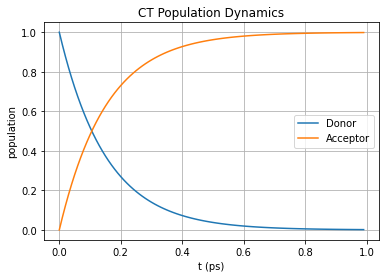

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t, pop)
plt.title("CT Population Dynamics")
plt.xlabel("t (ps)")
plt.ylabel("population")
plt.legend(["Donor","Acceptor"])
plt.grid(True)
plt.show()

To get a feeling how the system parameters affect the dynamics, modify the energies, couplings and temperature and run the simulation again.

**Which parameters yield the fastest transfer?**